### Chargement de données

In [109]:
import pandas as pd

df = pd.read_csv('../data/raw/DataSet_Emails.csv')

### 1. Examiner la structure du dataset
- Affichage

In [110]:
df.head()

,Unnamed: 0,message_id,text,label,label_text,subject,message,date
0,0,33214,any software just for 15 $ - 99 $ understandin...,1,spam,any software just for 15 $ - 99 $,understanding oem software\nlead me not into t...,2005-06-18
1,1,11929,perspective on ferc regulatory action client c...,0,ham,perspective on ferc regulatory action client c...,"19 th , 2 : 00 pm edt\nperspective on ferc reg...",2001-06-19
2,2,19784,wanted to try ci 4 lis but thought it was way ...,1,spam,wanted to try ci 4 lis but thought it was way ...,viagra at $ 1 . 12 per dose\nready to boost yo...,2004-09-11
3,3,2209,"enron / hpl actuals for december 11 , 2000 tec...",0,ham,"enron / hpl actuals for december 11 , 2000",teco tap 30 . 000 / enron ; 120 . 000 / hpl ga...,2000-12-12
4,4,15880,looking for cheap high - quality software ? ro...,1,spam,looking for cheap high - quality software ? ro...,"water past also , burn , course . gave country...",2005-02-13


- Colonnes

In [111]:
print("Nombre de colonnes:", len(df.columns), '\n')

print("La liste des colonnes:")
for col in df.columns:
    print('\t-', col)

Nombre de colonnes: 8 

La liste des colonnes:
	- Unnamed: 0
	- message_id
	- text
	- label
	- label_text
	- subject
	- message
	- date


- Types des colonnes

In [112]:
df.dtypes

Unnamed: 0     int64
message_id     int64
text          object
label          int64
label_text    object
subject       object
message       object
date          object
dtype: object

- Suppression de la colonne: Unnamed: 0

In [113]:
df = df.drop("Unnamed: 0", axis=1)

- Taille

In [114]:
dim = df.shape

print("Nombre de lignes:\t", dim[0])
print("Nombre de colonnes:\t", dim[1])

Nombre de lignes:	 31716
Nombre de colonnes:	 7


- Format des emails

In [115]:
line = df.iloc[0, :]
print("Subject:\n", line["subject"], "\n")
print("Body:\n", line["message"], "\n")
print("Text:\n", line["text"], "\n")

Subject:
 any software just for 15 $ - 99 $ 

Body:
 understanding oem software
lead me not into temptation ; i can find the way myself .
# 3533 . the law disregards trifles . 

Text:
 any software just for 15 $ - 99 $ understanding oem software
lead me not into temptation ; i can find the way myself .
# 3533 . the law disregards trifles . 



In [116]:
line = df.iloc[3, :]
print("Subject:\n", line["subject"], "\n")
print("Body:\n", line["message"], "\n")
print("Text:\n", line["text"], "\n")

Subject:
 enron / hpl actuals for december 11 , 2000 

Body:
 teco tap 30 . 000 / enron ; 120 . 000 / hpl gas daily
ls hpl lsk ic 30 . 000 / enron 

Text:
 enron / hpl actuals for december 11 , 2000 teco tap 30 . 000 / enron ; 120 . 000 / hpl gas daily
ls hpl lsk ic 30 . 000 / enron 



### 2. Détecter et traiter les valeurs manquantes.

##### 2.1. Détection

- Le nombre de valeurs manquantes dans chaque colonne

In [117]:
df.isna().sum()

message_id      0
text           51
label           0
label_text      0
subject       274
message       345
date            0
dtype: int64

- Le nombre total de valeurs manquantes

In [118]:
int(df.isna().sum().sum())

670

- Le nombre de lignes dont le texte, sujet et message sont tous nul

In [119]:
int(df[df['text'].isna() & df['subject'].isna() & df['message'].isna()]['label'].count())

51

- Texte est une concatenation de sujet et de message

In [120]:
df[df['text'] == df['subject'].str.strip().str.cat(df['message'].str.strip(), sep=' ')].count()

message_id    31132
text          31132
label         31132
label_text    31132
subject       31132
message       31132
date          31132
dtype: int64

##### 2.2. Traitement
On supprimer les lignes dont le texte est manquante

In [122]:
df_notna = df[df['text'].notna()]

##### 2.3. Sauvegarder

In [123]:
df_notna.to_csv("../data/processed/data_sans_valeurs_manquantes.csv", index=False)

### 3. Identifier et supprimer les doublons.

- Le nombre de lignes doublons

In [124]:
int(df_notna.drop('message_id', axis=1).duplicated().sum())

2619

- Le nombre de textes doublons

In [125]:
int(df_notna["text"].duplicated().sum())

2854

- Supprimer les doublons

In [126]:
df_cleaned = df_notna[~df_notna["text"].duplicated()]

- Nombre de lignes aprés les modifications

In [129]:
len(df_cleaned)

28811

- Sauvegarder les resultats

In [127]:
df_cleaned.to_csv("../data/processed/data_cleaned.csv", index=False)

### 4. Analyser la distribution de la variable cible (spam vs ham).

- Le nombre de lignes dans chaque categorie

In [130]:
df_cleaned['label_text'].value_counts()

label_text
ham     14982
spam    13829
Name: count, dtype: int64

- Le percentage de chque categorie

In [132]:
df_cleaned['label_text'].value_counts(normalize=True) * 100

label_text
ham     52.000972
spam    47.999028
Name: proportion, dtype: float64

Les classes sont déja équilibrées

### 5. Générer des WordClouds pour visualiser les mots fréquents

- Path de font

In [133]:
from matplotlib import font_manager
font = font_manager.findfont("DejaVu Sans")
print(font)

C:\Users\anass\AppData\Local\Programs\Python\Python311\Lib\site-packages\matplotlib\mpl-data\fonts\ttf\DejaVuSans.ttf


- Générer des WordClouds

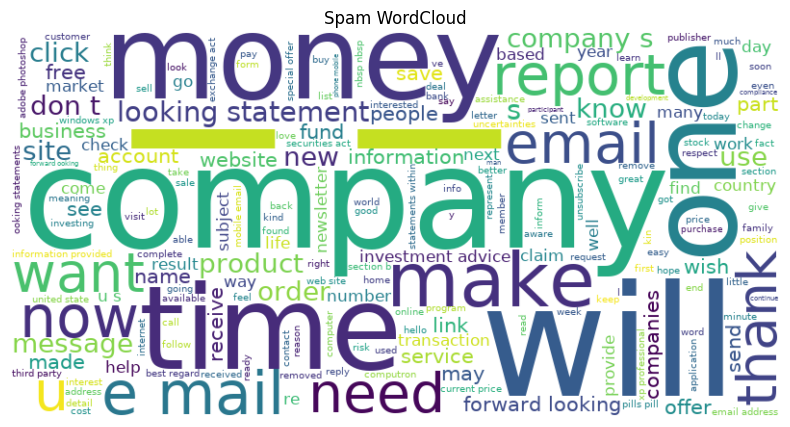

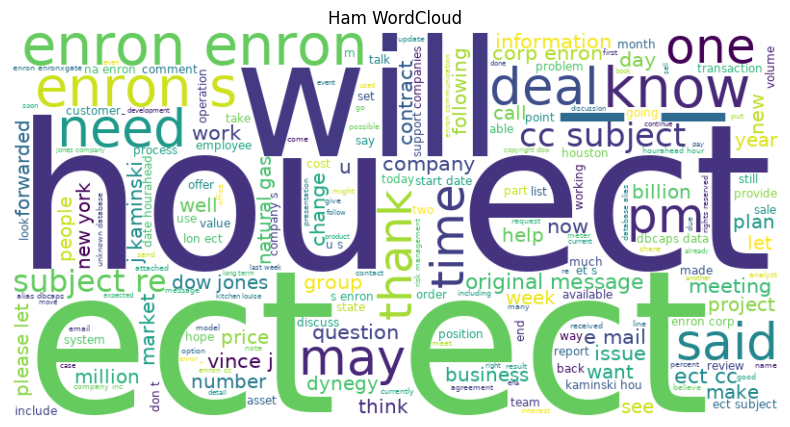

In [134]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Ensure column names match
text_column = "text"
label_column = "label_text"

spam_text = " ".join(df_cleaned[df_cleaned[label_column] == "spam"][text_column])
ham_text = " ".join(df_cleaned[df_cleaned[label_column] == "ham"][text_column])

# Use your valid TTF font here
font_path = font

def create_wordcloud(text, title):
    wc = WordCloud(width=800, height=400, font_path=font_path, background_color="white")
    wc.generate(text)

    plt.figure(figsize=(10, 5))
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title(title)
    plt.show()

create_wordcloud(spam_text, "Spam WordCloud")
create_wordcloud(ham_text, "Ham WordCloud")
